In [97]:
import pandas as pd

In [98]:
dt = pd.read_csv('creditcard.csv')

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
sc = StandardScaler()
dt['Amount'] = sc.fit_transform(pd.DataFrame(dt['Amount']))

In [101]:
dt = dt.drop(['Time'], axis=1)

In [102]:
dt = dt.drop_duplicates()

In [103]:
import seaborn as sns

In [104]:
dt['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

In [105]:
X = dt.drop('Class', axis=1)
Y = dt['Class']

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [107]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, Y_train)

LogisticRegression()

In [108]:
Y_pred1 = LR.predict(X_test)

In [109]:
from sklearn.metrics import accuracy_score

In [110]:
accuracy_score(Y_test, Y_pred1)

0.9992200678359603

In [111]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [112]:
precision_score(Y_test, Y_pred1)

0.8870967741935484

In [113]:
recall_score(Y_test, Y_pred1)

0.6043956043956044

In [114]:
f1_score(Y_test, Y_pred1)

0.718954248366013

In [115]:
normal = dt[dt['Class'] == 0]
fraud = dt[dt['Class'] == 1]

In [116]:
normal_sample = normal.sample(n=473)

In [117]:
new_dt = pd.concat([normal_sample, fraud], ignore_index=True)

In [118]:
X = new_dt.drop('Class', axis = 1)
Y = new_dt['Class']

In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [120]:
LR.fit(X_train, Y_train)

LogisticRegression()

In [121]:
Y_pred1 = LR.predict(X_test)

In [122]:
accuracy_score(Y_test, Y_pred1)

0.9473684210526315

In [123]:
precision_score(Y_test, Y_pred1)

0.9893617021276596

In [124]:
recall_score(Y_test, Y_pred1)

0.9117647058823529

In [125]:
f1_score(Y_test, Y_pred1)

0.9489795918367346

In [126]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [127]:
Y_pred2 = dtc.predict(X_test)

In [128]:
accuracy_score(Y_test, Y_pred2)

0.9

In [129]:
precision_score(Y_test, Y_pred2)

0.9108910891089109

In [130]:
recall_score(Y_test, Y_pred2)

0.9019607843137255

In [131]:
f1_score(Y_test, Y_pred2)

0.9064039408866996

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)

RandomForestClassifier()

In [134]:
Y_pred3 = RF.predict(X_test)

In [135]:
accuracy_score(Y_test, Y_pred3)

0.9421052631578948

In [136]:
recall_score(Y_test, Y_pred3)

0.9019607843137255

In [137]:
f1_score(Y_test, Y_pred3)

0.9435897435897437

In [138]:
precision_score(Y_test, Y_pred3)

0.989247311827957

In [139]:
final_dt = pd.DataFrame({'Models': ['LR', 'DT', 'RF'],
                         "ACC": [accuracy_score(Y_test, Y_pred1)*100,
                                 accuracy_score(Y_test, Y_pred2)*100,
                                 accuracy_score(Y_test, Y_pred3)*100,]})

final_dt

,Models,ACC
0,LR,94.736842
1,DT,90.000000
2,RF,94.210526


<Axes: xlabel='Models', ylabel='ACC'>

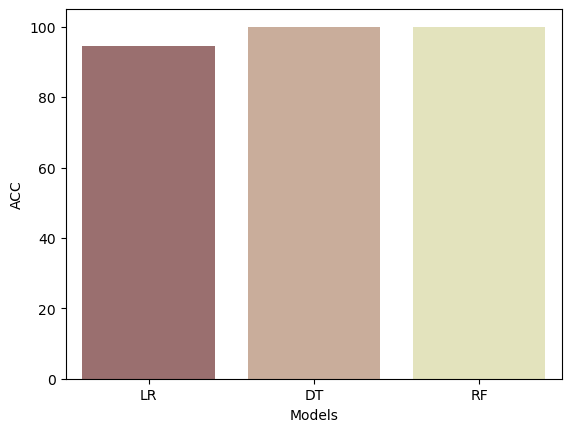

In [96]:
sns.barplot(x=final_dt['Models'], y=final_dt['ACC'], palette=sns.color_palette("pink", n_colors=len(final_dt['Models'])))

In [45]:
dt = pd.read_csv('creditcard.csv')

In [46]:
dt['Amount'] = sc.fit_transform(pd.DataFrame(dt['Amount']))

In [47]:
dt = dt.drop(['Time'], axis=1)

In [48]:
dt = dt.drop_duplicates()

In [49]:
X = dt.drop('Class', axis=1)
Y = dt['Class']

In [57]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_res, Y_res = ros.fit_resample(X, Y)

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size=0.20, random_state=42)

In [61]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)

LogisticRegression()

In [64]:
Y_pred1 = LR.predict(X_test)

In [65]:
accuracy_score(Y_test, Y_pred1)

0.9461917220829246

In [66]:
precision_score(Y_test, Y_pred1)

0.9756551403318344

In [67]:
recall_score(Y_test, Y_pred1)

0.9151500827227605

In [68]:
f1_score(Y_test, Y_pred1)

0.9444345419578779

In [69]:
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

DecisionTreeClassifier()

In [70]:
Y_pred2 = DT.predict(X_test)

In [71]:
accuracy_score(Y_test, Y_pred2)

0.9997547149242342

In [72]:
recall_score(Y_test, Y_pred2)

1.0

In [73]:
precision_score(Y_test, Y_pred2)

0.99950935853171

In [74]:
f1_score(Y_test, Y_pred2)

0.9997546190688249

In [75]:
RFC = RandomForestClassifier()
RFC.fit(X_train, Y_train)

RandomForestClassifier()

In [76]:
Y_pred3 = RFC.predict(X_test)

In [77]:
accuracy_score(Y_test, Y_pred3)

0.9999727461026927

In [78]:
recall_score(Y_test, Y_pred3)

1.0

In [79]:
precision_score(Y_test, Y_pred3)

0.9999454604952187

In [80]:
f1_score(Y_test, Y_pred3)

0.9999727295039497

In [81]:
final_dt = pd.DataFrame({'Models': ['LR', 'DT', 'RF'],
                         "ACC": [accuracy_score(Y_test, Y_pred1)*100,
                                 accuracy_score(Y_test, Y_pred2)*100,
                                 accuracy_score(Y_test, Y_pred3)*100,]})

final_dt

,Models,ACC
0,LR,94.619172
1,DT,99.975471
2,RF,99.997275


<Axes: xlabel='Models', ylabel='ACC'>

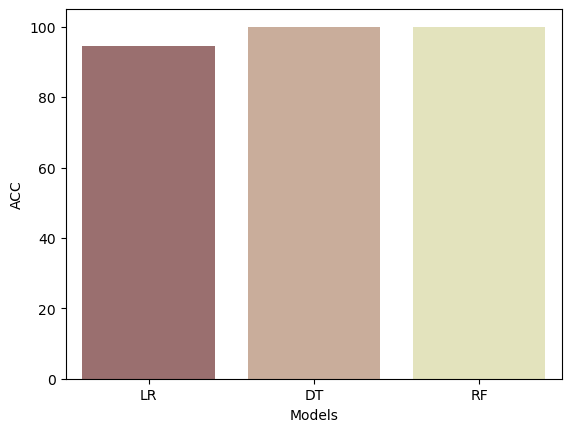

In [94]:
import matplotlib.pyplot as plt
sns.barplot(x=final_dt['Models'], y=final_dt['ACC'], palette=sns.color_palette("pink", n_colors=len(final_dt['Models'])))


In [83]:
rf1 = RandomForestClassifier()
rf1.fit(X_res, Y_res)

RandomForestClassifier()

In [84]:
import joblib

In [85]:
joblib.dump(rf1, 'credit_card_model')

['credit_card_model']

In [86]:
model = joblib.load("credit_card_model")